In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import pickle

In [89]:
df=pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [90]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [92]:
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


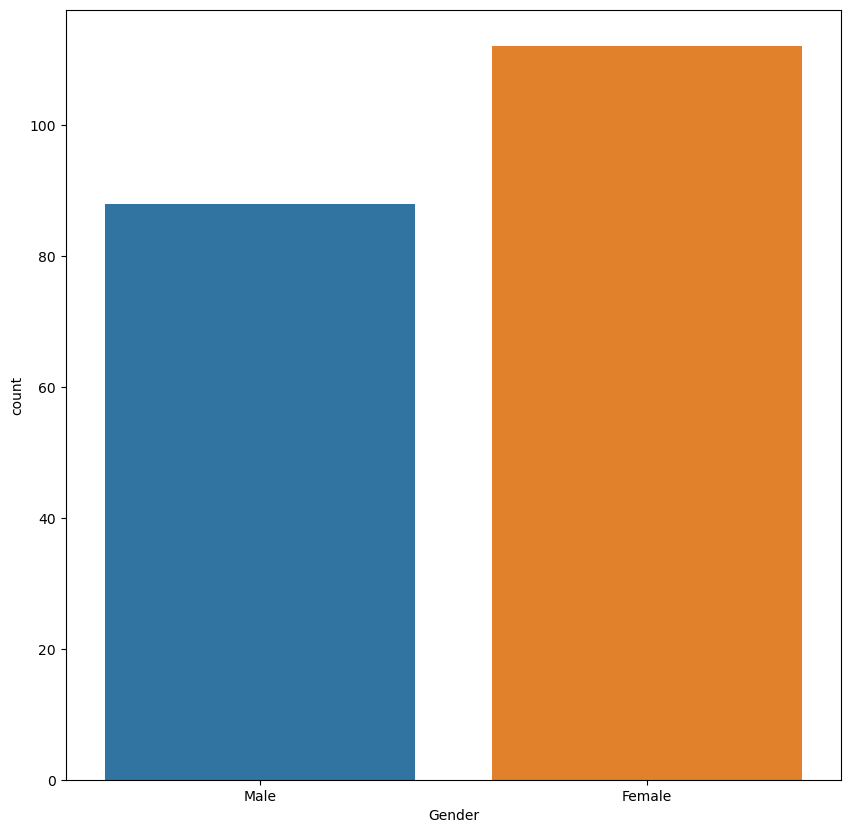

In [93]:
plt.figure(figsize=[10,10])
sns.countplot(x=df.Gender,data=df)
plt.show()

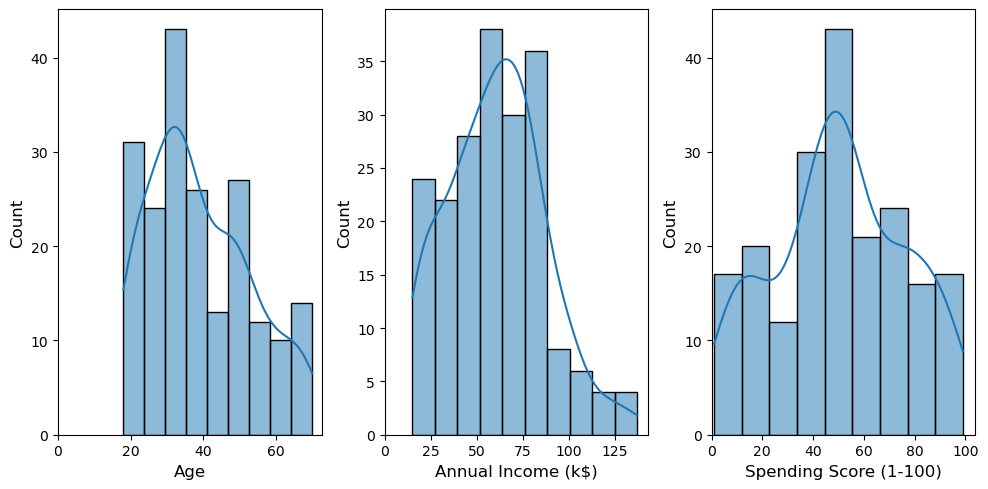

In [94]:


continuous_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
num_rows = 1   
num_cols = 3

# Create a new figure and axis objects
fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 5))   # Adjust figsize for 1 row

# Use a counter variable to keep track of the current subplot index
count = 0

# Loop over the subplots and create a kernel density plot for each column in continuous_cols
for j in range(num_cols):   # Remove outer loop over rows
    if count < len(continuous_cols):
        # Get the current column name from continuous_cols
        col_name = continuous_cols[count]

        # Create a kernel density plot for the current column
        sns.histplot(x=col_name, data=df, kde=True, ax=ax[j])

        # Set the lower limit of the x-axis to zero
        ax[j].set_xlim(left=0)

        # Add labels to the subplot
        ax[j].set_xlabel(col_name, fontsize=12)
        ax[j].set_ylabel('Count', fontsize=12)

        # Move to the next subplot
        count += 1

plt.tight_layout()
plt.show()

## Findings :
* Female number are greater than male in this dataset.
* Distrbution of Age, Annaul Income and Spending Score are likely to be normally distrbuted

In [95]:
label_encoder=LabelEncoder()
df['Male']=label_encoder.fit_transform(df['Gender'])   ## 1 for male,0 for female
df.drop(['Gender'],inplace=True,axis=1)

In [96]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


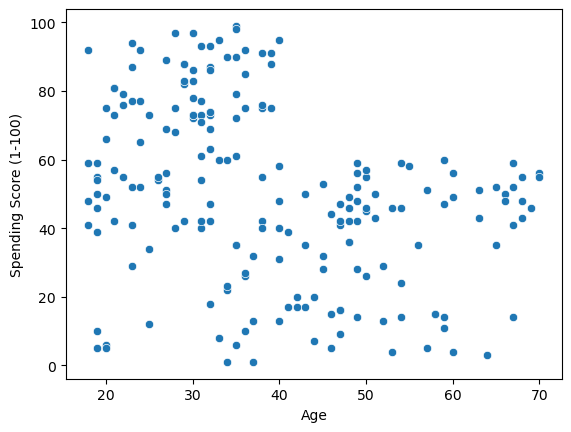

In [97]:

sns.scatterplot(x='Age',y='Spending Score (1-100)',data=df)
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

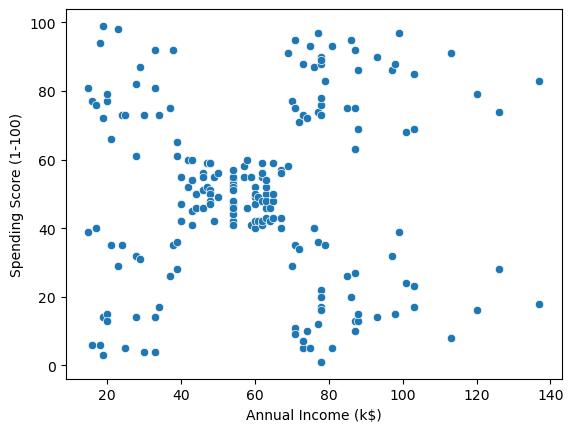

In [98]:
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df)
plt.show

##

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

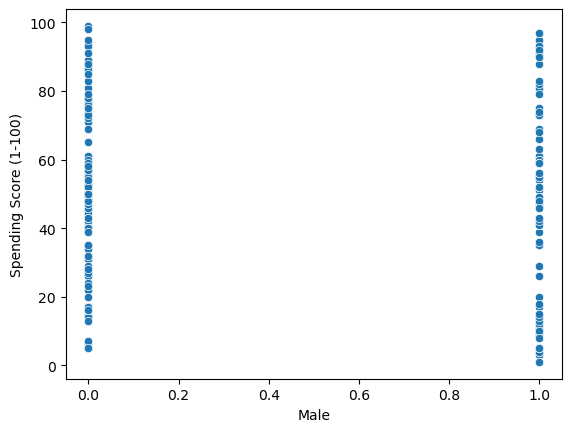

In [99]:
sns.scatterplot(x='Male',y='Spending Score (1-100)',data=df)
plt.plot

In [100]:
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

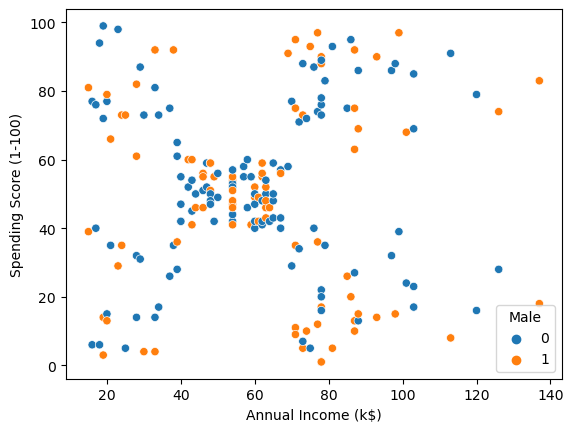

In [101]:
sns.scatterplot(x=df['Annual Income (k$)'],y=df['Spending Score (1-100)'],data=df,hue='Male')

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

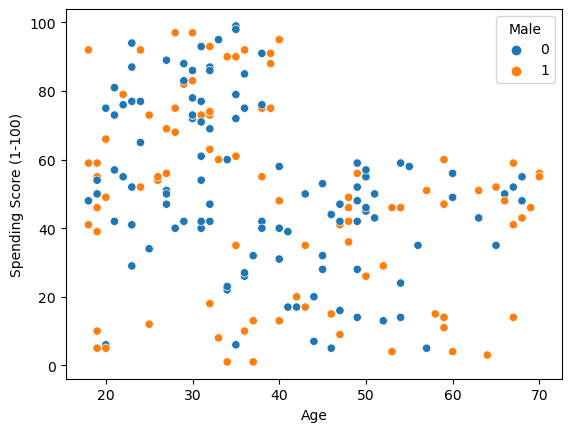

In [102]:
sns.scatterplot(x=df['Age'],y=df['Spending Score (1-100)'],data=df,hue='Male')

## Findings:
* from 20 to 40 years is the most spending score
* there is a pattern between 40 to 60 in Annual income
* femals are more spendeing score than males.
* there are no clear relation between age,Annual Income (k$),Spending Score (1-100)
* when the age in low the Spending become higher

In [103]:
corr=df.corr()
corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male
CustomerID,1.000000,-0.026763,0.977548,0.013835,0.057400
Age,-0.026763,1.000000,-0.012398,-0.327227,0.060867
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903,0.056410
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000,-0.058109
Male,0.057400,0.060867,0.056410,-0.058109,1.000000


<Axes: >

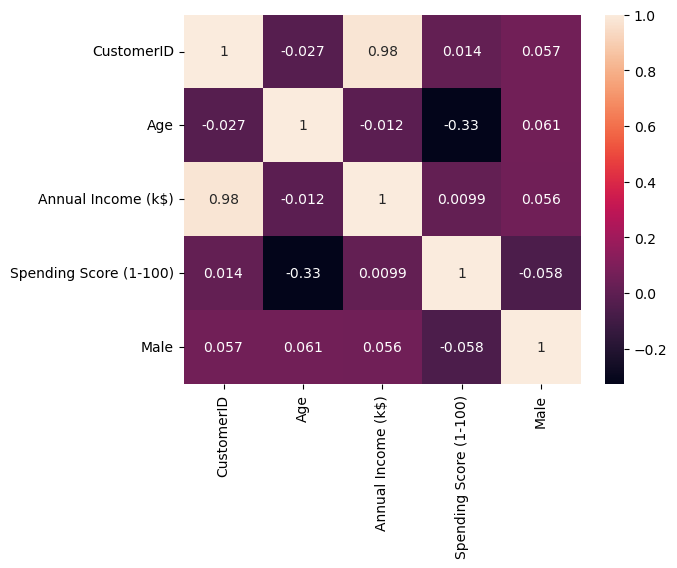

In [104]:
sns.heatmap(corr,annot=True)

In [105]:
df2=df.iloc[:,[2,3]].values
df2

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [106]:
km_list = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
  kmeans.fit(df2)

  km_list.append(kmeans.inertia_)

Text(0.5, 1.0, 'elbow point graph')

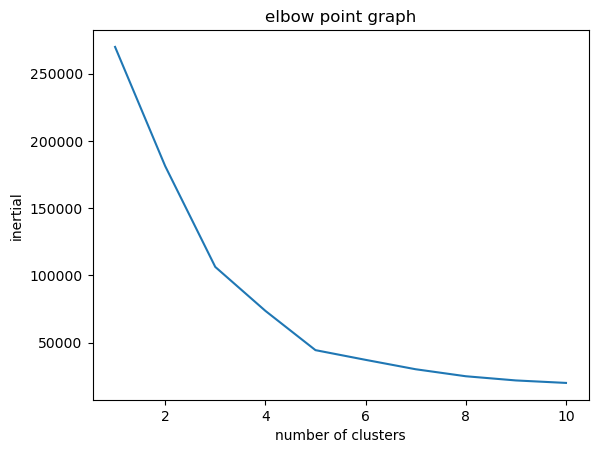

In [107]:
plt.plot(range(1,11),km_list)
plt.xlabel('number of clusters')
plt.ylabel('inertial')
plt.title('elbow point graph')

## Findings:
* number of clusters is 5

In [108]:
KM=KMeans(n_clusters=5, init='k-means++',random_state=42)
clutsers=KM.fit_predict(df2)
clutsers


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

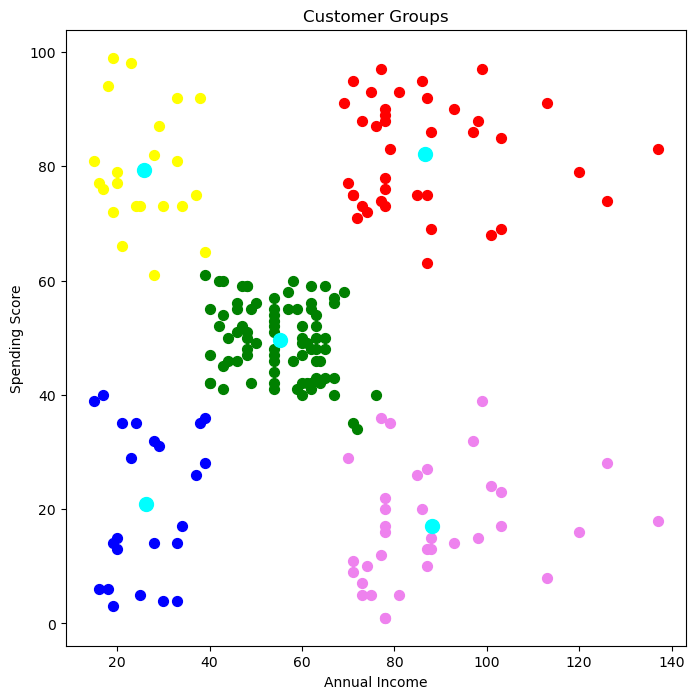

In [109]:
plt.figure(figsize=(8,8))
plt.scatter(df2[clutsers==0,0], df2[clutsers==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(df2[clutsers==1,0], df2[clutsers==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(df2[clutsers==2,0], df2[clutsers==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(df2[clutsers==3,0], df2[clutsers==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(df2[clutsers==4,0], df2[clutsers==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(KM.cluster_centers_[:,0], KM.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [110]:
df['group']=clutsers
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Male,group
0,1,19,15,39,1,4
1,2,21,15,81,1,2
2,3,20,16,6,0,4
3,4,23,16,77,0,2
4,5,31,17,40,0,4
...,...,...,...,...,...,...
195,196,35,120,79,0,1
196,197,45,126,28,0,3
197,198,32,126,74,1,1
198,199,32,137,18,1,3


<Axes: >

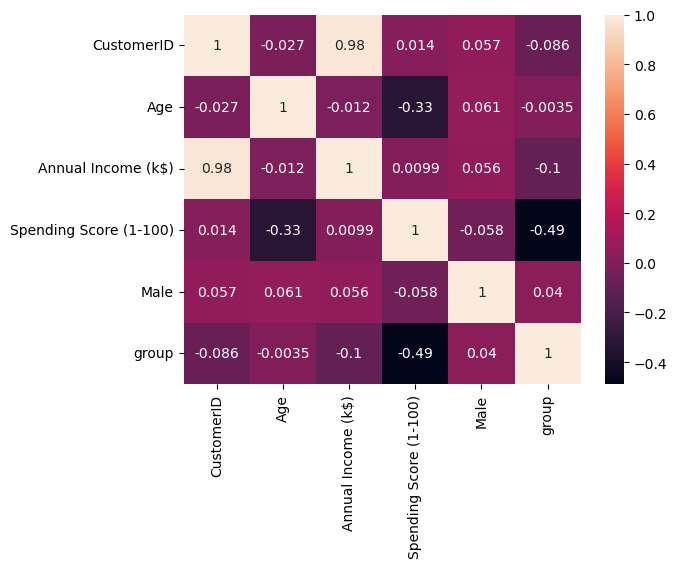

In [111]:
corr2=df.corr()
sns.heatmap(corr2,annot=True)

<Axes: xlabel='group', ylabel='count'>

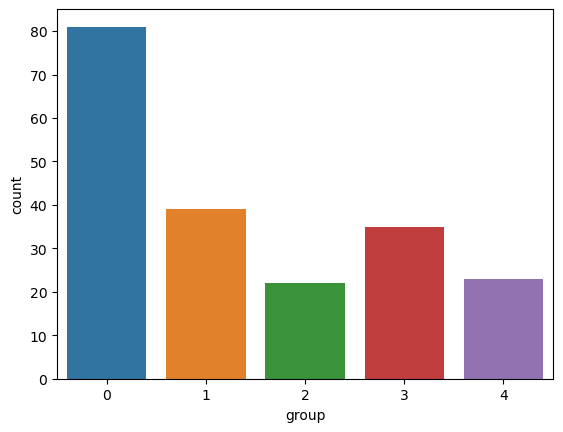

In [112]:
sns.countplot(x='group',data=df)

<Axes: xlabel='Male', ylabel='count'>

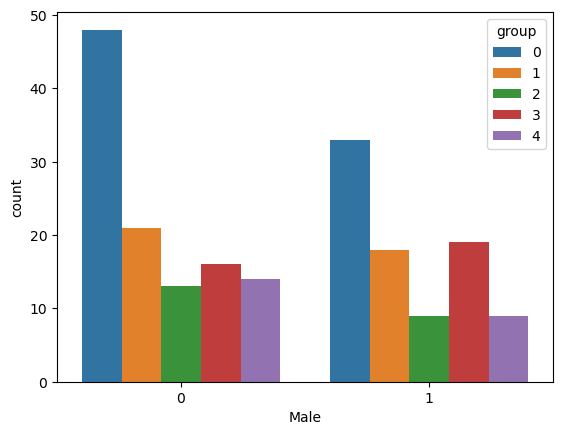

In [113]:
sns.countplot(x='Male',data=df,hue='group')


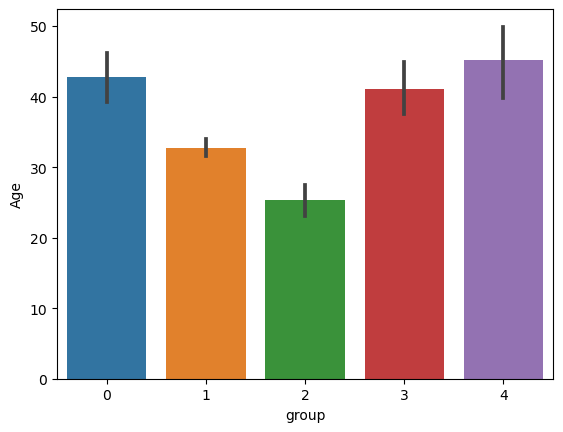

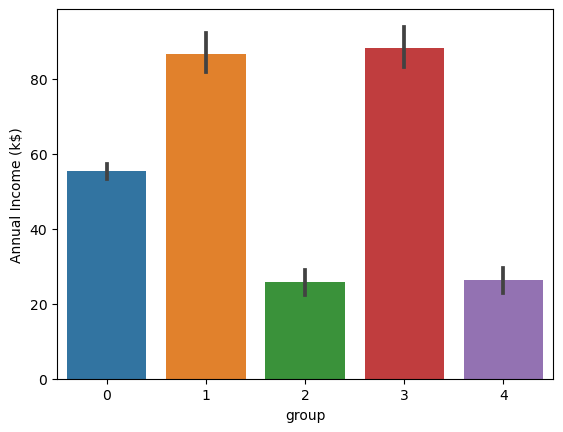

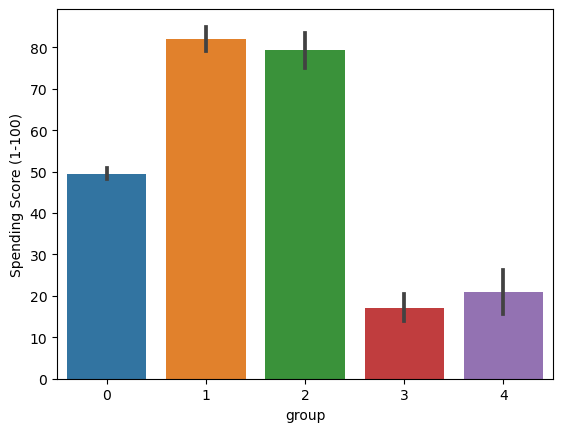

In [114]:
list=['Age','Annual Income (k$)','Spending Score (1-100)']
i=0
while i<len(list):
    sns.barplot(y=list[i],data=df,x='group')
    plt.show()
    i+=1




## Findings:
*  group 0 is the most here.
* cluster 0 age to 43 & income is up to 65 and spending is up to 49
* cluster 1 age is to 33 & income is up to 90 and spending is up to 81
* cluster 2 age is to 24 & income is up to 24 and spending is up to 77
* cluter 3 age is to 40 & income is up to 90 and spending is up to 15 
* cluter 4 age is to 55 & income is up to 20 and spending is up to 20

In [115]:
df.drop(['CustomerID'],axis=1,inplace=True)
df


,Age,Annual Income (k$),Spending Score (1-100),Male,group
0,19,15,39,1,4
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,2
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,3
197,32,126,74,1,1
198,32,137,18,1,3


In [116]:
df

,Age,Annual Income (k$),Spending Score (1-100),Male,group
0,19,15,39,1,4
1,21,15,81,1,2
2,20,16,6,0,4
3,23,16,77,0,2
4,31,17,40,0,4
...,...,...,...,...,...
195,35,120,79,0,1
196,45,126,28,0,3
197,32,126,74,1,1
198,32,137,18,1,3


In [117]:
y=df.group
x = df.drop("group", axis=1)

In [118]:
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)
x_scale

array([[-1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.06573534, -1.54815205,  1.04041783, -0.88640526],
       [-0.13276838, -1.54815205, -1.44416206,  1.12815215],
       [-1.20926872, -1.54815205,  1.11806095,  1.12815215],
       [-0.27630176, -1.

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.25)


In [135]:
def TrainTest(model,modelName):
    model.fit(x_train, y_train)
    model_train_score=model.score(x_train,y_train)
    model_test_score=model.score(x_test,y_test)
    print(f"{modelName} model score on Training data: {model_train_score * 100}%\n{modelName} model score on Testing data: {model_test_score * 100}%")
    return model
def class_report(model):
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
def kfolds(model, model_name):
    model = cross_val_score(model, x,y, cv=5)
    model_score = np.average(model)
    print(f"{model_name} score on cross validation: {model_score * 100}%")
def conff_matrix(model):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm, annot=True)


    


In [136]:
model_random_forest=RandomForestClassifier()
TrainTest(model_random_forest,'Radom Forest')
kfolds(model_random_forest,'Random forest')


Radom Forest model score on Training data: 100.0%
Radom Forest model score on Testing data: 96.0%
Random forest score on cross validation: 92.00000000000001%


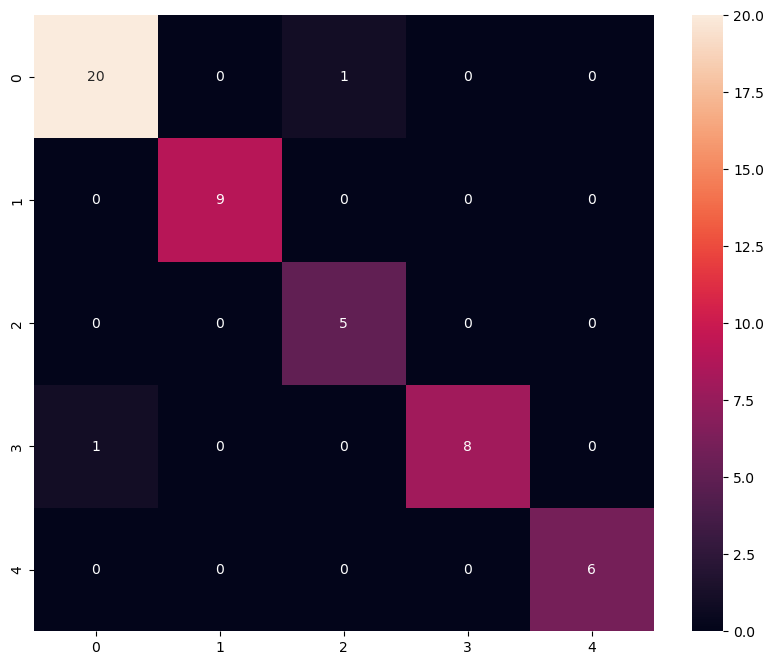

In [137]:
conff_matrix(model_random_forest)

In [138]:
class_report(model_random_forest)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         9
           2       0.83      1.00      0.91         5
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         6

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



In [141]:
logistic_model=LogisticRegression()
TrainTest(logistic_model,'Logistic regression')
kfolds(logistic_model,'logitic regression')

Logistic regression model score on Training data: 99.33333333333333%
Logistic regression model score on Testing data: 94.0%
logitic regression score on cross validation: 83.0%


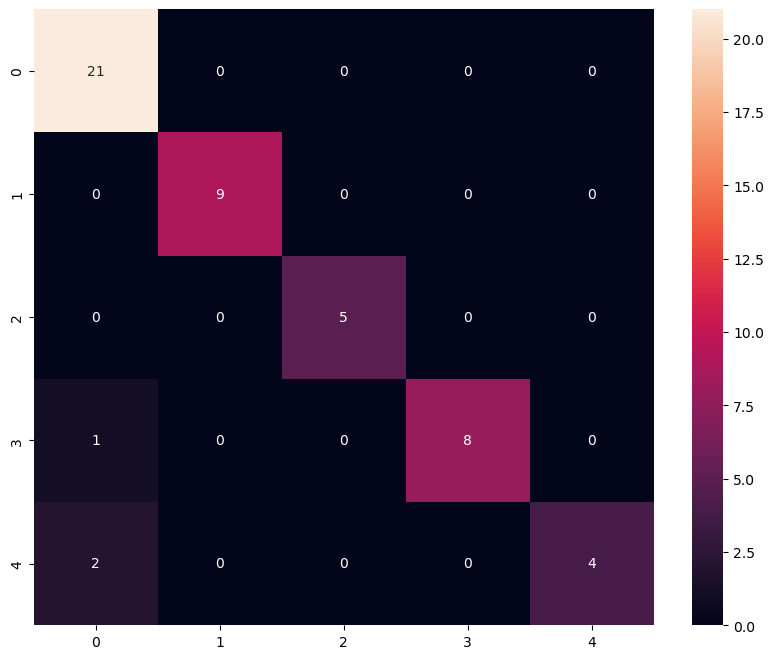

In [142]:
conff_matrix(logistic_model)

In [143]:
class_report(logistic_model)

              precision    recall  f1-score   support

           0       0.88      1.00      0.93        21
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      0.89      0.94         9
           4       1.00      0.67      0.80         6

    accuracy                           0.94        50
   macro avg       0.97      0.91      0.93        50
weighted avg       0.95      0.94      0.94        50



In [145]:
decission_tree_model=DecisionTreeClassifier()
TrainTest(decission_tree_model,'decission tree')
kfolds(decission_tree_model,'Decision Tree')

decission tree model score on Training data: 100.0%
decission tree model score on Testing data: 96.0%
Decision Tree score on cross validation: 78.49999999999999%


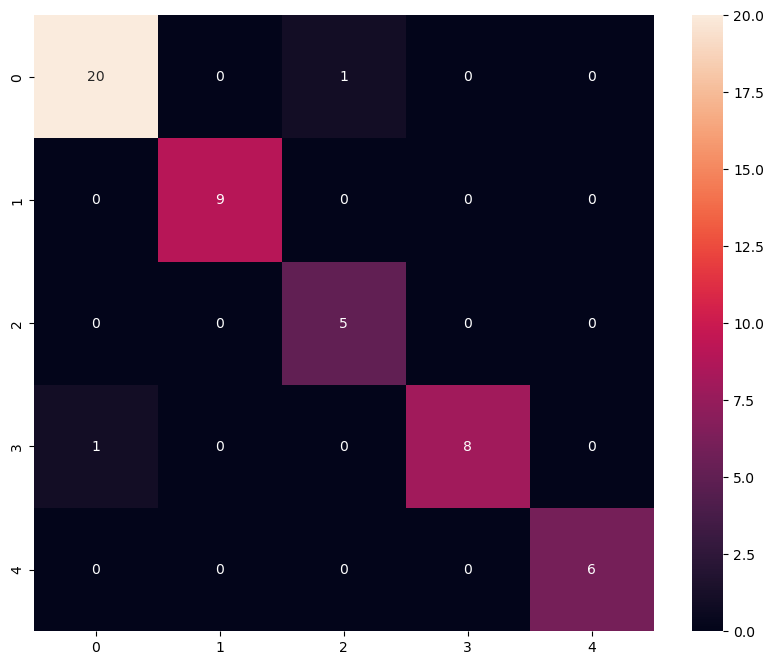

In [146]:
conff_matrix(decission_tree_model)

In [147]:
class_report(decission_tree_model)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       1.00      1.00      1.00         9
           2       0.83      1.00      0.91         5
           3       1.00      0.89      0.94         9
           4       1.00      1.00      1.00         6

    accuracy                           0.96        50
   macro avg       0.96      0.97      0.96        50
weighted avg       0.96      0.96      0.96        50



In [150]:
SVM_model=SVC()
TrainTest(SVM_model,'SVM')
kfolds(SVM_model,'SVM')

SVM model score on Training data: 100.0%
SVM model score on Testing data: 96.0%
SVM score on cross validation: 97.5%


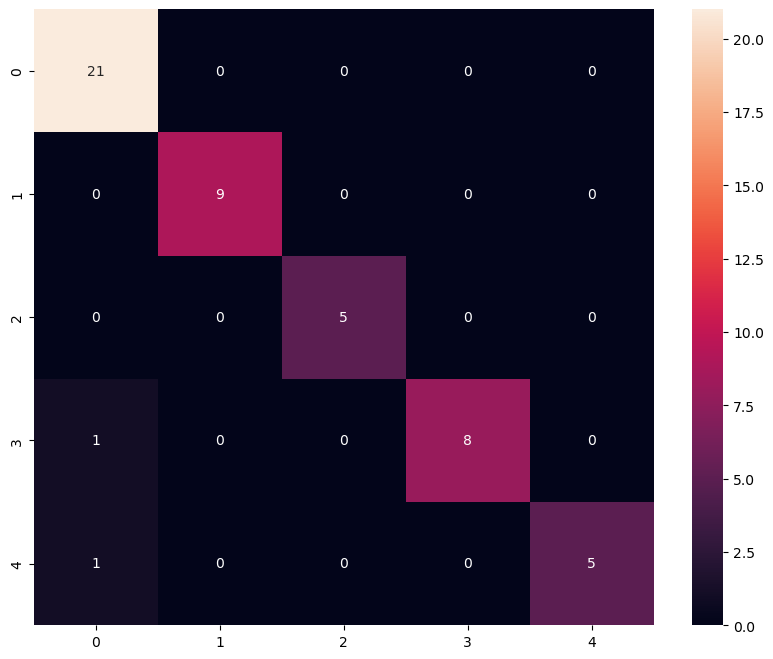

In [151]:
conff_matrix(SVM_model)

In [152]:
class_report(SVM_model)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         5
           3       1.00      0.89      0.94         9
           4       1.00      0.83      0.91         6

    accuracy                           0.96        50
   macro avg       0.98      0.94      0.96        50
weighted avg       0.96      0.96      0.96        50



In [154]:
with open('mall_customers.pkl', 'wb') as file:
    pickle.dump(model_random_forest, file) #put model in file
    

In [156]:
with open('mall_customers.pkl', 'rb') as file:
    model=pickle.load( file) #put model in file

In [161]:
age=30
income=80
spending=80
Male=1

In [162]:
input={'Age':age,'Annual Income (k$)':income,
'Spending Score (1-100)':spending,
'Male':Male}

In [168]:
input_values = pd.Series(input).values.reshape(1, -1)
predicted_class = model.predict(input_values)
print(predicted_class)

[1]
